<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/12/ML_Lab_5_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# PyTorch

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Pytorch</li>
</ol>

## 1. **Способы создания нейросетей**

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras


## TensorFlow

Практически самый популярный фреймворк для создания нейросетей PyTorch  (первое место пополам с TensorFlow).
PyTorch - это фреймворк для создания ML моделей.

Facebook 2015. PyTorch - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. PyTorch позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

## Основы синтаксиса

## **Установка и работа с данными**

In [ ]:
# в Colaboratory уже есть!
#!pip3 install torch torchvision

Выведем строку Hello world, а также версию torch

In [1]:
import torch
print(torch.__version__)



2.1.0+cu118


## 2. **Основы синтаксиса PyTorch**

Процесс создания нейросети на PyTorch

Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа PyTorch складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в PyTorch в виде графов.  

## 2.1 Тензоры

Тензоры схожи с ndarrays в NumPy, с добавлением того, что тензоры могут быть использованы на GPU для ускорения вычислений.

In [2]:
from IPython import display
import numpy as np
import random
import torch

### **Тензор**

Тензор - основная структура данных в библиотеках машинного обучения, которая похожа на массив Numpy. Что-то вроде n-мерной матрицы или массива массивов.Тензоры обеспечивают ускорение различных математических операций. Эти операции при выполнении в большом количестве в глубоком обучении имеют огромное значение в скорости.

Тип данных, хранимых тензором, отражается в имени его конструктора. Конструктор без параметров вернёт специальное значение — тензор без размерности, который нельзя использовать ни в каких операциях.


In [3]:
torch.FloatTensor()
a = torch.Tensor()

Типы тензоров в pytorch:

torch.HalfTensor      # 16 бит, с плавающей точкой  
torch.FloatTensor     # 32 бита,  с плавающей точкой  
torch.DoubleTensor    # 64 бита, с плавающей точкой  

torch.ShortTensor     # 16 бит, целочисленный, знаковый  
torch.IntTensor       # 32 бита, целочисленный, знаковый  
torch.LongTensor      # 64 бита, целочисленный, знаковый  

torch.CharTensor      # 8 бит, целочисленный, знаковый  
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый


Пример создания тензора:


  

In [4]:
a = torch.FloatTensor([1.0])
b = torch.DoubleTensor([2.0])
print(a)
print(b)
a * b

tensor([1.])
tensor([2.], dtype=torch.float64)


tensor([2.], dtype=torch.float64)

Но где-то могут возникать проблемы в виду разных типов. Для этого предусмотрена возможность явного приведения типов:

In [5]:
a = torch.IntTensor([1])
print(a.type())
a = a.byte()
print(a.type())

torch.IntTensor
torch.ByteTensor


In [6]:
a.float()

tensor([1.])

### 2.2 Именование функций и различные типы функций

Соглашение о именовании в PyTorch гласит, что любая функция вида xxx возвращает новый тензор, т.е. является immutable функцией. В противоположность ей функция вида xxx_ изменяет изначальный тензор, т.е. является mutable функцией. Последние ещё носят название inplace функций.
Почти для любой immutable функции в PyTorch существует её собрат. Однако бывает и так, что функция существует лишь в каком-то одном варианте. По понятным причинам, функции, изменяющие размер тензора всегда являются immutable.

https://pytorch.org/docs/stable/torch.html - документация

In [7]:
a = [1. , 1.4 , 2.5]
a_tensor = torch.tensor(a)
print(f"тип тензора : ", a_tensor.type())
print(f"просто создали тензор: {torch.tensor(a)}")
print(f"тензор с типом : {torch.FloatTensor(a)}")
print(f"тензор из 0-й:\n {torch.zeros((2, 3))}")
print(f"Превращаем а в нули : {a_tensor.zero_()}")
print(f"Заполним тензор константой : {a_tensor.fill_(5)}")
print(f"Range: {torch.arange(0, 10)}")
print(f"range с шагом: {torch.arange(4, 12, 2)}")
print(f"Space: {torch.linspace(1, 4, 6)}")




тип тензора :  torch.FloatTensor
просто создали тензор: tensor([1.0000, 1.4000, 2.5000])
тензор с типом : tensor([1.0000, 1.4000, 2.5000])
тензор из 0-й:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Превращаем а в нули : tensor([0., 0., 0.])
Заполним тензор константой : tensor([5., 5., 5.])
Range: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
range с шагом: tensor([ 4,  6,  8, 10])
Space: tensor([1.0000, 1.6000, 2.2000, 2.8000, 3.4000, 4.0000])


**Случайные генерации тензоров**

Cлучайные тензоры

In [8]:
print(f"случайное значение в диапазоне от 0 до 1: {torch.rand(1)}")
print(f"вектор со значениями 0 to 1: {torch.rand(5)}")
print(f"нормально распределенный вектор со средним 0 и рассеиванием 1: {torch.randn(2, 3)}")
print(f"случайный вектор длины 5 с числами от 0 to 10: {torch.randint(10, size=(5,))}")
#print(f"Непрерывное равномерное распределение : {torch.uniform(0, 5)}")

случайное значение в диапазоне от 0 до 1: tensor([0.3348])
вектор со значениями 0 to 1: tensor([0.7075, 0.5479, 0.5441, 0.5385, 0.9981])
нормально распределенный вектор со средним 0 и рассеиванием 1: tensor([[ 3.2081,  0.1471,  0.4714],
        [ 2.2705, -0.1028, -0.0397]])
случайный вектор длины 5 с числами от 0 to 10: tensor([8, 7, 2, 1, 5])


**Математические операции**

С матричными операциями так же все аналогично с тем же numpy

In [9]:
a = torch.arange(10).type(torch.FloatTensor)
b = torch.linspace(-10, 10, 10)
print(f"a: {a}\nshape: {a.size()}")
print(f"b: {b}\nshape: {b.size()}")

a: tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
shape: torch.Size([10])
b: tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000])
shape: torch.Size([10])


In [10]:
print(f"a + b: {a + b},\n a * b: {a * b}")
print(f"a + b: {a.add(b)},\n a * b: {a.mul(b)}") # вычитание sub, деление - div
print("\n тут накопление в а: ")
print(f"a + b: {a.add_(b)},\n a * b: {a.mul_(b)}") # тут операции наместе и будет накопление значений в тензоре а

a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])

 тут накопление в а: 
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([100.0000,  52.7160,  19.7531,   1.1111,  -3.2099,   6.7901,  31.1111,
         69.7531, 122.7160, 190.0000])


функции из стандартного набора:

In [11]:
a = torch.arange(10).type(torch.FloatTensor)

print(f"Экспонента : {a.exp()},\n {torch.exp(a)}, \n {a.exp_()}")
print(f"Логарифм : {a.log()}")
print(f"Модуль : {a.abs()}")
print(f"sin(x) : {a.sin()}")

Экспонента : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]),
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]), 
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
Логарифм : tensor([0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000, 7.0000, 8.0000,
        9.0000])
Модуль : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
sin(x) : tensor([ 0.8415,  0.4108,  0.8939,  0.9445, -0.9288, -0.6877,  0.9649, -0.2156,
         0.4017, -0.7935])


In [12]:
print(f"Скалярное произведение: {a.dot(b)}")
print(f"Mean: {a.mean()}, STD: {a.std()}")
print(f"Sum: {a.sum()}, Min: {a.min()}, Max: {a.max()}")

Скалярное произведение: 111618.3359375
Mean: 1281.830810546875, STD: 2571.337890625
Sum: 12818.30859375, Min: 1.0, Max: 8103.083984375


Изменения размерности и формы тензора:

  - получить форму тензора

In [13]:
a.shape

torch.Size([10])

  - иззменить форму тензора

In [14]:
print(f"Reshape:\n{a.reshape(-1, 1)}\nshape: {a.reshape(-1, 1).size()}")
c = a.reshape(-1, 1).repeat(1, 5)
print(f"Повторения:\n{c}\nshape: {c.size()}")
print(f"Транспонирование:\n{c.T}\nshape: {c.T.size()}")
print(f"Уникальные элементы: {torch.unique(c)}")

Reshape:
tensor([[1.0000e+00],
        [2.7183e+00],
        [7.3891e+00],
        [2.0086e+01],
        [5.4598e+01],
        [1.4841e+02],
        [4.0343e+02],
        [1.0966e+03],
        [2.9810e+03],
        [8.1031e+03]])
shape: torch.Size([10, 1])
Повторения:
tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00],
        [7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00],
        [2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01],
        [5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01],
        [1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02],
        [4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02],
        [1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03],
        [2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03],
        [8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03]])
shape: torch.Size([10, 5])
Тра

Индексирование:
  - работает как в numpy
  - начинаем с 0
  - отрицательная индексация
  - срезы





In [15]:
a = torch.arange(100).reshape(10, 10)
print(f"Array:\n{a}\nshape: {a.size()}")
print(f"Get first column: {a[:, 0]}")
print(f"Get last row: {a[-1, :]}")
print(f"Add new aхis:\n{a[:, np.newaxis]}\nshape: {a[:, np.newaxis].size()}")
print(f"Specific indexing:\n{a[4:6, 7:]}")

Array:
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])
shape: torch.Size([10, 10])
Get first column: tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Get last row: tensor([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Add new aхis:
tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],

  

Из numpy в pytorch и обратно:

In [16]:
a = torch.normal(mean=torch.zeros(2,4))
a.numpy()

array([[-0.27983087,  0.69685   , -1.1562464 ,  1.8422211 ],
       [-1.1388172 , -0.6361791 , -1.211874  ,  0.80392456]],
      dtype=float32)

In [17]:
b = np.random.normal(size=(2, 4))
torch.from_numpy(b)

tensor([[ 0.6898,  0.5855, -0.5112,  2.1991],
        [ 0.4708,  0.9155, -1.1267, -3.2443]], dtype=torch.float64)

### 2.3 CUDA

torch.cuda - это пакет для поддержки CUDA. Он поддерживает такую же функциональность как и CPU, но использует CUDA ядра для вычислений. С полным функционалом можно ознакомиться [здесь](https://pytorch.org/docs/stable/cuda.html?highlight=cuda#module-torch.cuda)

Работа с графическими ускорителями (если они есть):

  -  проверить существование
  -  можно включать и отключать принудительно

In [18]:
print(f"Поддерживается ли CUDA : {torch.cuda.is_available()}")
print(f'Количество гпу девайсов: {torch.cuda.device_count()}')
print(f"Характеристики видеокарты : {torch.cuda.get_device_properties(0)}")
print(f"Удаляем всю незанятую память через torch.cuda.empty_cache()")

Поддерживается ли CUDA : True
Количество гпу девайсов: 1
Характеристики видеокарты : _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)
Удаляем всю незанятую память через torch.cuda.empty_cache()


инициализуем два тензора:

In [19]:
a = torch.normal(mean=torch.zeros(2, 4))
b = torch.normal(mean=torch.zeros(2, 4))
print(f"a:\n{a}\nb:\n{b}")

a:
tensor([[ 1.2884,  1.2940, -0.1359, -0.1038],
        [-0.3486, -0.0059, -0.4030, -1.3918]])
b:
tensor([[-0.4229,  0.0760,  0.0547,  1.1200],
        [-0.9175,  0.3570,  0.8884,  0.4164]])


тензоры автоматом загружены в память cpu, но перевести их на gpu таким способом:

In [20]:
a = a.cuda()
a



tensor([[ 1.2884,  1.2940, -0.1359, -0.1038],
        [-0.3486, -0.0059, -0.4030, -1.3918]], device='cuda:0')

если попробуем сложить эти два тензора, то ошибка, т.к. один тензор на cpu, а другой на cuda:

Пример:

In [21]:
a + b



RuntimeError: ignored

**ТЕНЗОРЫ ДОЛЖНЫ БЫТЬ НА ОДНОМ УСТРОЙСТВЕ!!!!!**

In [22]:
a + b.cuda()

tensor([[ 0.8655,  1.3700, -0.0812,  1.0162],
        [-1.2661,  0.3511,  0.4855, -0.9754]], device='cuda:0')

In [23]:
a.cpu() + b

tensor([[ 0.8655,  1.3700, -0.0812,  1.0162],
        [-1.2661,  0.3511,  0.4855, -0.9754]])

In [24]:
(a + b.cuda()).cpu()

tensor([[ 0.8655,  1.3700, -0.0812,  1.0162],
        [-1.2661,  0.3511,  0.4855, -0.9754]])

**.cuda()** immutable функция. Т.е. она возвращает новый тензор, а не перезаписывает существующий a. Что бы интерпретатор запомнил что a у нас на куде необходимо присвоить значение выражение в тензор.

Переместить можно не только a.cuda(), но и так:

In [25]:
a.to("cpu")

tensor([[ 1.2884,  1.2940, -0.1359, -0.1038],
        [-0.3486, -0.0059, -0.4030, -1.3918]])

## Задание 1

In [26]:
# 1. Создайте случайный Float размера 3x4x5

In [27]:
# 2. Выведите его форму (shape)

In [28]:
# 3. Приведите его к форме 6х10

In [29]:
# 4. Создайте случайный Int размера 10

In [30]:
# 5. Умножьте созданный Float на созданный Int поэлементно

In [31]:
# 6. Умножьте тензор матрично на себя, чтобы результат был размерности 6x6

In [32]:
# 8. Создайте единичный тензор размера 5x6

In [33]:
# 9. Переведите его в формат numpy

Эффективность ГПУ:

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


**Пример.** Сделаем по 10 циклов на GPU и CPU:

In [35]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    torch.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
device = torch.device("cpu")
x = torch.randn([1000, 1000]).to(device)
time_matmul(x)

# исполнение на GPU #0 , если доступен
print(" GPU работает:")
device = torch.device("cuda:0")
x = torch.randn([1000, 1000]).to(device)
time_matmul(x)

 CPU работает:
10 циклов: 165.77ms
 GPU работает:
10 циклов: 3006.06ms


Запустить код выше несколько раз (первый запуск даст неверные оценки, т.к. загружается работа с ГПУ)

У каждого тензора есть поле device, которое по умолчанию стоит cpu. Но мы можем менять его при инициализации или в процессе использования:

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

torch.randn(10, 10, device=device)

cuda:0


tensor([[ 1.1717, -1.0655,  0.4551,  0.0359,  0.6510,  0.0649, -0.9182, -1.5751,
         -0.5422,  0.3498],
        [-1.3356, -0.8003, -0.2215, -1.5846, -1.3540, -0.1599, -1.2592,  1.0246,
          0.9694, -0.9749],
        [-0.6027, -1.3816, -1.2047,  0.3480,  0.0449, -1.7898, -0.1723, -0.1106,
         -0.0830,  0.1648],
        [ 0.8851,  0.7754,  0.1278,  0.8158, -1.1140, -0.4798,  1.1787, -0.6590,
         -0.2854, -1.1752],
        [-0.9795,  0.0594, -0.0134,  0.6741,  0.6016,  0.3040, -0.7206, -0.1230,
         -0.3697, -0.0300],
        [-0.0877, -0.7775, -0.5702,  0.8471, -0.2684, -0.4895,  0.0361,  2.3559,
         -0.1103,  0.3794],
        [ 0.1405,  1.2149,  0.0427, -0.7018,  0.5883, -0.7846, -0.2599,  0.7566,
          0.5587, -0.1122],
        [ 0.3007, -0.5513, -1.1052,  0.6886, -0.6286, -1.4954,  0.6801, -0.5667,
          0.2112, -0.4928],
        [ 0.3126,  0.7176, -1.4300, -0.2386, -2.2174,  0.5430, -0.9450, -1.1942,
         -1.0674,  0.6002],
        [ 1.8211, -


### 3.1 Вычислительный граф

Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Автоматическое дифференцирование - строительный блок не только в Pytorch, но и в каждой другой DL библиотеке. Движок автоматического дифференцирования в Pytorch называет [Autograd](https://pytorch.org/docs/stable/autograd.html).

Современные архитектуры нейронных сетей могут иметь миллионы обучающихся параметров. С вычислительной точки зрения тренировка сети состоит из двух фаз:

1) Прямой проход для вычисления значения функции потерь.  
2) Обратный проход для вычисления градиентов обучаемых параметров.

Прямой проход весьма прямолинеен: выход одного слоя является входом другого.
Обратный проход немного сложнее, поскольку он требует от нас использования цепного правила для вычисления градиентов весов относительно функции потерь.

Ниже представлен простой пример вычислительного графа для вычисления выражения $\sigma(x*w_1 + w_0)$. Можно разбить вычисление на следующие шаги:

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.

### 3.2 PyTorch Autograd

тензор - это структура данных, которая является фундаментальным строительным блоком PyTorch и они во многом похожи на массивы numpy, за исключением того, что в отличие от numpy, тензоры предназначены для использования преимуществ параллельных вычислений графического процессора(GPU).

In [37]:
import torch
tsr = torch.Tensor(3,5)
tsr

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.6587e-27],
        [ 3.1285e-41, -3.1494e+06,  3.1284e-41, -7.0814e+10,  4.5247e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

Tensor похож на numpy ndarray. Структура данных, которая позволяет быстро выполнять операции линейной алгебры. Что бы сделать тензор обучающимся и мы бы смогли вычислить его градиент, необходимо поставить его параметр **requires_grad** в значение True.

**requires_grad** можно менять как при инициализации тензора, так и после:

In [38]:
t1 = torch.randn((3, 3), requires_grad=True)
print(t1.requires_grad)
t2 = torch.FloatTensor(3, 3)
print(t2.requires_grad)

True
False


In [39]:
t2.requires_grad = True
print(t2.requires_grad)

True


**requires_grad** заразителен. Это означает, что когда тензор создается с помощью других тензоров, для параметра requires_grad результирующего тензора будет установлено значение True, если хотя бы один из тензоров, используемых для создания, имеет для параметра **requires_grad** значение **True**.

In [40]:
x = torch.ones(3, requires_grad=True)
x

tensor([1., 1., 1.], requires_grad=True)

В x у нас хранится информация о градиенте. Мы можем получить ее через метод grad:

In [41]:
x.grad

В данном случае ничего нет, т.к. никаких действий с нашим тензором не производили.

**ГЛАВНЫЙ ФОКУС!!!**
Вычисляем производные (для дифференцируемых функций) автоматически по всему запомненному графу вычислений

  - Создадим переменную на основе x:

In [42]:
z = (x ** 2) + 5.0 * x  # задание - посчитать производную руками

  - вызываем метод **backward** и передаем единичный тензор:

In [43]:
z.backward(x)

 - можем смотреть градиент:

In [44]:
x.grad

tensor([7., 7., 7.])

## Задание 2

In [45]:
# 1. Посчитайте производную функции y = x**3  в точке x = ( 0.5)

In [46]:
# 2. Посчитайте производную функции y = x[0]**3 + x[1] - 75*x[2] в точке x = (1, 0.5, 2)

**Пример Производная** :

Пример из 7-го класса "физика":

input_t = tf.Variable(np.arange(10), dtype='float32') # t  входная переменная функции (вектор моментов времени от 0 до 9 секунд - вещественных чисел - тензор)
with tf.GradientTape() as outer_tape: # создаем объект1 для слежения (записи) тензорных связей и зависимостей (вторая производная)
  with tf.GradientTape() as inner_tape: # создаем объект2 для слежения (записи) тензорных связей и зависимостей (первая производная)
    x =  4.9 * input_t ** 2  # g * t^2 /2   функция от входной переменной (перемещение)
  speed = inner_tape.gradient( x, input_t)  # g * t  первая производная (скорость)
acceleration = outer_tape.gradient(speed, input_t)   # g вторая производная (ускорение)

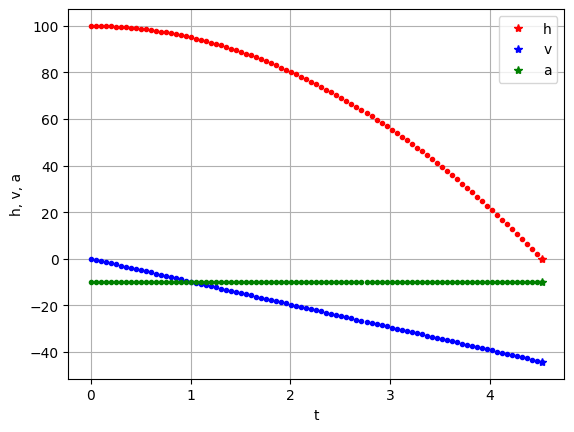

In [47]:
import numpy as np
import matplotlib.pyplot as plt

t_all = np.linspace(0.,10.,200) # t  входная переменная функции (вектор моментов времени от 0 до 9 секунд - вещественных чисел - тензор)
h0 = torch.FloatTensor([100])
v0 = torch.FloatTensor([0])
g = torch.FloatTensor([-9.8])
x = h0
i = 0
while x>0:
    t = torch.tensor(t_all[i], requires_grad=True)
    x = h0 + v0 * t + g * (t ** 2) / 2 # g * t^2 /2 функция от входной переменной (перемещение)
    x.backward() # g * t первая производная (скорость)

    t1 = torch.tensor(t_all[i], requires_grad=True)
    s = v0 + g * t1
    s.backward() # g вторая производная (ускорение)

    # print(t.grad[i])
    plt.plot(t.item(),x.item(),'r.')
    plt.plot(t.item(),t.grad.item(),'b.')
    plt.plot(t1.item(),t1.grad.item(),'g.')
    i += 1

# отобразим

plt.plot(t.item(),x.item(),'r*', label = 'h')
plt.plot(t.item(),t.grad.item(),'b*', label = 'v')
plt.plot(t1.item(),t1.grad.item(),'g*', label = 'a')
plt.grid()
plt.xlabel('t')
plt.ylabel('h, v, a')

plt.legend()
plt.show()


## Задание 3

In [48]:
# 1. Посчитайте 1-ю производную функции y = x**3  в точке x = ( 0.5)

## **Создание нейронной сети**

**Создание модели**

Все модели создаем на основе классов ( в самом глубоком уровне наследований от torch.nn.Model()):
  - модели torch.nn.Sequential() [https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html]. Последовательный контейнер. Модули будут добавляться в него в том порядке, в котором они переданы в конструкторе -
      например:

                model = nn.Sequential(nn.Linear(n_in, n_h),
                          nn.ReLU(),
                          nn.Linear(n_h, n_out),
                          nn.Sigmoid())
                линейный слой, слой кусочно-линейный, линейный слой, сигмоидный слой             
  - модели в форме графового конструктора на основе torch.nn.Module()[https://pytorch.org/docs/stable/generated/torch.nn.Module.html]. Базовый класс для всех модулей нейронной сети. Сеть на основе такого подхода выглядит как например:
                class Feedforward(nn.Module):
                  def __init__(self, input_size, hidden_size):
                      # создаем объекты слои
                      super().__init__()
                      self.input_size = input_size
                      self.hidden_size  = hidden_size
                      self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
                      self.relu = torch.nn.ReLU()
                      self.fc2 = torch.nn.Linear(self.hidden_size, 1)
                      self.sigmoid = torch.nn.Sigmoid()
                  # создаем поток прямого прохода     
                  def forward(self, x):
                      x = self.fc1(x)
                      x = self.relu(x)
                      x = self.fc2(x)
                      x = self.sigmoid(x)
                      return x

  общая структура любой сети:
    - входы
    - слои (все слои в )
    - выходы





Напишим небольшую полносвязную сеть:

In [49]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision

In [50]:
model = nn.Sequential(nn.Linear(1, 2),
   nn.ReLU(),
   nn.Linear(2, 1),
   nn.Sigmoid())

In [51]:
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)
        # torch.nn.init.xavier_uniform(self.fc.weight)
        print(self.fc)
        self.relu = nn.ReLU()

    def forward(self, x):
        print('input', x)
        output = self.fc(x)
        print('output fc', output)
        output = self.relu(output)
        print('output relu', output)
        return output

Создаем объект нового типа Perceptron (1 слой):

In [52]:
perc = Perceptron()
perc

Linear(in_features=1, out_features=1, bias=True)


Perceptron(
  (fc): Linear(in_features=1, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
# Так выглядит обработка тензора в  нейронной сети
perc(torch.FloatTensor([5]))

input tensor([5.])
output fc tensor([-4.5447], grad_fn=<ViewBackward0>)
output relu tensor([0.], grad_fn=<ReluBackward0>)


tensor([0.], grad_fn=<ReluBackward0>)

веса и сдвиги слоев:

In [54]:
perc.fc.weight, perc.fc.bias

(Parameter containing:
 tensor([[-0.9252]], requires_grad=True),
 Parameter containing:
 tensor([0.0813], requires_grad=True))

2-х слойная сеть:

In [55]:
class Feedforward(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

На этой стадии мы должны сделать настройки процесса обучения нейронной сети:

  - **loss** - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети (богатый список вариантов потерь https://pytorch.org/docs/stable/nn.html#loss-functions).

  - **optimizer** - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети backpropagation (богатый список вариантов оптимизаторов https://pytorch.org/docs/stable/optim.html#algorithms)

  - **metrics** - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
необходимо подбирать метрику и потери в соответствии с задачей.

ключевые этапы обучения:

  - Сеть создать  **model = ClassModel(< arg >).**
  - перевести ее в режим обучения **model.train()**
  - создать критерий (например **loss_ = BCELoss()**)

  - Создать оптимизатор Optimizer и с ним связываются параметры сети (например Optimizer = SGD(**model.parameters()**, lr=0.01) ).

  - Тренировочный цикл (проходит по всем пакетам (с числом примеров  **bath_size**) из примеров Х, у и повторяется несколько раз (по числу эпох **epochs**)):

      - получает входные данные (обычно небольшой пакет примеров Х,у),

      - проводит их через сеть **у_ = model(Х)**,

      - подсчитывает потери  loss = loss_ (У, У_ ),

      - обнуляет градиенты параметров сети **Optimizer.zero_grad()**,

      - вызывает **loss.backward()** для обновления градиентов параметров,

      - вызывает **Optimizer.step()**, чтобы применить градиенты к параметрам.

Оптимизаторы **torch.optim** :
* SGD() (с или без моментом) https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#sgd
* Adam() https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#adam
* Adagrad() https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html#adagrad
…

Функции потерь **torch.nn** :
* CategoricalCrossentropyLoss() https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
* BCELoss() https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#bceloss
* MSELoss() https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#mseloss
* KLDivLoss() https://pytorch.org/docs/stable/generated/torch.nn.KLDivLoss.html#torch.nn.KLDivLoss
* CosineSimilarity() https://pytorch.org/docs/stable/generated/torch.nn.CosineSimilarity.html#cosinesimilarity
…


Разберем этот пример.

**X, y** - содержат все обучающие данные

**epochs** - определяет сколько раз через нейросеть должен пройти весь набор данных

**bath_size** - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.



### **Пример:**

### ***Подготовка данных***

Откроем набор данных "рукописные цифры" - это классика
В качестве входных объектов видим картинки 28х28 пикселей (полутоновые), а на выходе должны указать к какому классу принадлежит цифра (метки от 0 до 9)

In [56]:
from torchvision.datasets import mnist  # импорт функции для загрузки набора данных (это рукописные цифры)
from torchvision import transforms

# читаем данные из базового датасета MNIST для обучения
train_dataset=mnist.MNIST(root='',train=True, transform=transforms.ToTensor(), download=True)   # загружаем (вернет кортеж тренировочный примров (изображение, метка)
# get pair
image, label = train_dataset[0]
print(image.size())
print(label)



100%|██████████| 9912422/9912422 [00:00<00:00, 187744803.49it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44258565.52it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 54368505.68it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21238047.68it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([1, 28, 28])
5


Создаем загрузчик данных:

In [57]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

Создаем датасет и загрузчик для тестов:

In [58]:
test_dataset = mnist.MNIST(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 157963629.07it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 126843658.45it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 71189230.83it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21796943.67it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Введем имена классов:

In [59]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [60]:
import matplotlib.pyplot as plt


Посмотрим на пример:

In [61]:
for images, labels in train_loader:
  print(labels[:10])
  break

tensor([6, 3, 7, 4, 4, 3, 6, 3, 2, 9])


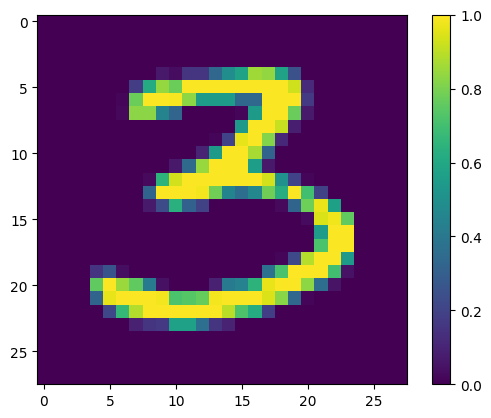

In [62]:
n = 1
plt.figure()
plt.imshow(images[n,0,:,:])
plt.colorbar()
plt.grid(False)
plt.show()

Посмотрим на несколько примеров и их метки:

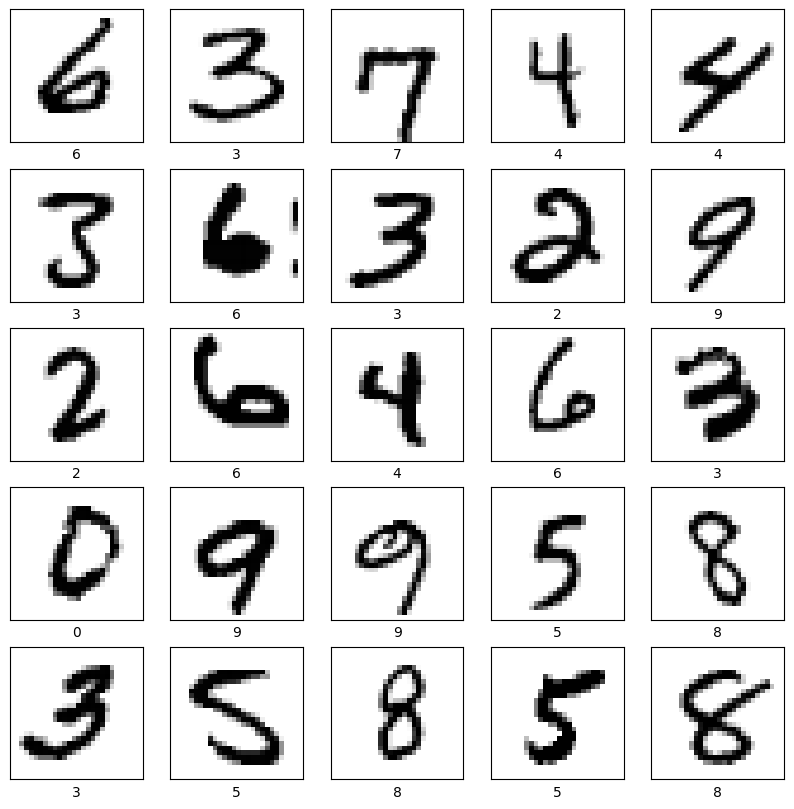

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i,0,:,:], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

### **Создадим сеть:**

In [118]:
from torch.nn import Sequential
from torch.nn import Linear, Sigmoid, Softmax, ReLU


In [119]:
# создаем линейную модель из списка
model = Sequential( Linear(784,512),    # размер вектора на входе и  размера слоя (число нейронов)
                    ReLU(),
                      Linear(512,128),# скрытый слой
                      ReLU(),
                       Linear(128, 10), Softmax())   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)

# собираем модель
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_fn = torch.nn.CrossEntropyLoss()


model   # отображения списка слоев модели (имя солоя, размер выхода, число параметров)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): Softmax(dim=None)
)

### **Обучаем сеть**

сеть ждет на вход вектор (М, 784) - М объектов по 784 признака ()

In [120]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = model(inputs.reshape(-1,784))
        # Рассчитываем лосс-функцию
        loss = loss_fn(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5]. Step [1/938]. Loss: 0.036
Epoch [1/5]. Step [301/938]. Loss: 0.026
Epoch [1/5]. Step [601/938]. Loss: 0.024
Epoch [1/5]. Step [901/938]. Loss: 0.024
Epoch [2/5]. Step [1/938]. Loss: 0.024
Epoch [2/5]. Step [301/938]. Loss: 0.024
Epoch [2/5]. Step [601/938]. Loss: 0.024
Epoch [2/5]. Step [901/938]. Loss: 0.024
Epoch [3/5]. Step [1/938]. Loss: 0.023
Epoch [3/5]. Step [301/938]. Loss: 0.023
Epoch [3/5]. Step [601/938]. Loss: 0.023
Epoch [3/5]. Step [901/938]. Loss: 0.023
Epoch [4/5]. Step [1/938]. Loss: 0.024
Epoch [4/5]. Step [301/938]. Loss: 0.023
Epoch [4/5]. Step [601/938]. Loss: 0.023
Epoch [4/5]. Step [901/938]. Loss: 0.023
Epoch [5/5]. Step [1/938]. Loss: 0.023
Epoch [5/5]. Step [301/938]. Loss: 0.023
Epoch [5/5]. Step [601/938]. Loss: 0.023
Epoch [5/5]. Step [901/938]. Loss: 0.023
Training is finished!


### ***Получаем предсказания для обученной сети:***

 - сделать препроцессинг тестовых примеров (мы его уже сделали выше)
 - передать тестовые примеры в сеть
 - увидеть ответ как цифру

In [67]:
outputs[:5,:]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 7.4646e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 8.2109e-26],
        [2.3642e-38, 0.0000e+00, 3.3783e-38, 8.8282e-44, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6620e-15, 0.0000e+00,
         0.0000e+00, 6.5726e-37, 5.5943e-35, 1.0000e+00]],
       grad_fn=<SliceBackward0>)

In [68]:
labels[:5]

tensor([7, 6, 7, 7, 9])

In [69]:
outputs.argmax(axis=1)

tensor([7, 6, 7, 7, 9, 3, 9, 7, 8, 2, 0, 4, 1, 6, 5, 7, 0, 1, 2, 0, 8, 6, 2, 0,
        5, 0, 0, 7, 4, 5, 6, 6])

In [70]:
accuracy = (outputs.argmax(axis=1) == labels).float().mean()
accuracy

tensor(0.8438)

In [121]:
model.eval()
accuracy = []
running_loss = 0.0
running_items = 0.0

for i, data in enumerate(test_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = model(inputs.reshape(-1,784))
        # Рассчитываем лосс-функцию
        loss = loss_fn(outputs, labels)
        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        accuracy += (outputs.argmax(axis=1) == labels).numpy().tolist()

        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')


print('Training is finished!')
print('loss_val:', running_loss / running_items)
print(' metric_val:', np.sum(accuracy) / running_items)

Epoch [5/5]. Step [1/938]. Loss: 0.183
Epoch [5/5]. Step [301/938]. Loss: 0.188
Epoch [5/5]. Step [601/938]. Loss: 0.188
Epoch [5/5]. Step [901/938]. Loss: 0.187
Epoch [5/5]. Step [1201/938]. Loss: 0.186
Training is finished!
loss_val: 0.18637083637714386
 metric_val: 0.9716


In [72]:
yp = model(inputs.reshape(-1,784))

In [73]:
yp = yp.detach().numpy()

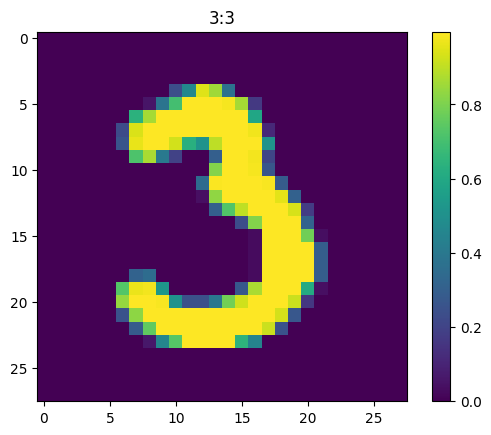

In [74]:
n = 4

yp_label = np.argmax(yp[n,:]) # Получаем предсказание как метку
plt.figure()
plt.imshow(inputs[n,0,:,:])
plt.colorbar()
plt.grid(False)
plt.title(str(class_names[labels[n]]) + ':' + str(class_names[yp_label]))
plt.show()

### **Сохраним модель на диск**

In [76]:
# сохранить веса модели.
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(model.state_dict(), PATH_WEIGHTS)

# загрузить веса модели:
# model.load_weights('model.h5')


## Работа на GPU и СPU:


Выбрать из возможностей CPU/GPU

In [145]:
def train(model, device, train_loader, num_epochs=5, optimizer=optimizer, loss_fn=loss_fn, n_plot = 300):

  model =  model.to(device)
  print(device)
  model.train()

  for epoch in range(num_epochs):
      running_loss = 0.0
      running_items = 0.0


      for i, data in enumerate(train_loader):
          inputs, labels = data[0].to(device), data[1].to(device)

          # Обнуляем градиент
          optimizer.zero_grad()
          # Делаем предсказание
          outputs = model(inputs.reshape(-1,784))
          # Рассчитываем лосс-функцию
          loss = loss_fn(outputs, labels)
          # Делаем шаг назад по лоссу
          loss.backward()
          # Делаем шаг нашего оптимайзера
          optimizer.step()

          # выводим статистику о процессе обучения
          running_loss += loss.item()
          running_items += len(labels)
          if i % n_plot == 0:    # печатаем каждые 300 mini-batches
              print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                    f'Step [{i + 1}/{len(train_loader)}]. ' \
                    f'Loss: {running_loss / running_items:.3f}')


  print('Training is finished!')
  return model, running_loss / running_items

In [147]:
# исполнение на GPU #0 , если доступен
model = Sequential( Linear(784,512),    # размер вектора на входе и  размера слоя (число нейронов)
                    ReLU(),
                    Linear(512,128),# скрытый слой
                    ReLU(),
                    Linear(128, 10), Softmax())   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)

# собираем модель
optimizer = torch.optim.Adam(model.parameters(), lr = 0.051)
loss_fn = torch.nn.CrossEntropyLoss()

device = torch.device("cpu")
print(device)

t1 = time.time()
model, loss = train(model, device,train_loader,optimizer=optimizer, loss_fn=loss_fn, num_epochs = 1)
print('time on work:',time.time() - t1)


cpu
cpu
Epoch [1/1]. Step [1/938]. Loss: 0.036
Epoch [1/1]. Step [301/938]. Loss: 0.037
Epoch [1/1]. Step [601/938]. Loss: 0.037
Epoch [1/1]. Step [901/938]. Loss: 0.037
Training is finished!
time on work: 14.509278774261475


Строго GPU:

In [146]:
print("On GPU:")
# исполнение на GPU #0 , если доступен
model = Sequential( Linear(784,512), ReLU(),   # размер вектора на входе и  размера слоя (число нейронов)
                      Linear(512,128), ReLU(),# скрытый слой
                       Linear(128, 10), Softmax())   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)

# собираем модель
optimizer = torch.optim.Adam(model.parameters(), lr = 0.051)
loss_fn = torch.nn.CrossEntropyLoss()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
t1 = time.time()
model, loss = train(model, device,train_loader,optimizer=optimizer, loss_fn=loss_fn, num_epochs = 1)
print('time on work:',time.time() - t1)

On GPU:
cuda:0
cuda:0
Epoch [1/1]. Step [1/938]. Loss: 0.036
Epoch [1/1]. Step [301/938]. Loss: 0.037
Epoch [1/1]. Step [601/938]. Loss: 0.037
Epoch [1/1]. Step [901/938]. Loss: 0.037
Training is finished!
time on work: 9.622270584106445


Посмотрите на время для исполнения одного шага в режиме графического ускорения 9 c, а для только центрального процессора 14c (в текущем сеансе колаборатории)
Обратите внимание, что значительное время уходит на перенос с ГПУ на ЦПУ и обратно.**Попробуйте оценить тольок время исполнения в модели.**

### **Визуализация процесса обучения**

## Задание 4.
Посмотрите на результаты обучения через кривые обучения. Для этого доработайте скрипт train для:
  - возвращения списка значений потерь по эпохам для тренировочного процесса
  - доработайте скрипт для оценки по итогу каждой эпохи мфлидационных потерь
  - постройте график потерь на обучении и валидации для обучения модели

## **Задание 5**

1. Создать сеть из 2-х слоев для обучения на МНИСТ
2. Создать сеть из 4-х слоев для обучения на МНИСТ
3. Сравнить сети из примеров и сети из п.1 и п.2 по качеству (метрикам) для эквивалентного числа эпох (10)
4. Провести обучение моделей до насыщения (качество на валидации перестало расти) и сравнить финальные показатели всех моделей
5. Собрать сеть из 3-х слоев, провести обучение до насыщения метрики и оценить изменение метрик на валидации при изменении числа нейронов в первом слое ( нейронов 2 ** i (i = 2,.., 10))
6.Сделать вывод по итогам моделирования.

### Оптимизаторы

Оптимизаторы влияют на результат обучения. Пример использования одной схемы модели, но несколько перезапусков (т.е. пересоздаем нейронную сеть и проводит инициализацию весов заново) даже для одно оптимизатора порождают разные нейронные сети, т.к. начинаем с разных начальных точек.

In [98]:
from torch.optim import Adam, SGD, RMSprop, Adagrad

In [148]:
def test(model, device, test_loader ):
  model.eval()
  mode = model.to(device)
  accuracy = []
  running_loss = 0.0
  running_items = 0.0

  for i, data in enumerate(test_loader):
          inputs, labels = data[0].to(device), data[1].to(device)
          # Делаем предсказание
          outputs = model(inputs.reshape(-1,784))
          # Рассчитываем лосс-функцию
          loss = loss_fn(outputs, labels)
          # выводим статистику о процессе обучения
          running_loss += loss.item()
          running_items += len(labels)
          accuracy += (outputs.argmax(axis=1) == labels).cpu().numpy().tolist()

  print('Training is finished!')
  print('loss_val:', running_loss / running_items)
  print('metric_val:', np.sum(accuracy) / running_items)
  return running_loss / running_items, np.sum(accuracy) / running_items

cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5]. Step [938/938]. Loss: 0.028
Epoch [2/5]. Step [1/938]. Loss: 0.025
Epoch [2/5]. Step [938/938]. Loss: 0.024
Epoch [3/5]. Step [1/938]. Loss: 0.023
Epoch [3/5]. Step [938/938]. Loss: 0.024
Epoch [4/5]. Step [1/938]. Loss: 0.023
Epoch [4/5]. Step [938/938]. Loss: 0.024
Epoch [5/5]. Step [1/938]. Loss: 0.023
Epoch [5/5]. Step [938/938]. Loss: 0.024
Training is finished!
Training is finished!
loss_val: 0.1894417802810669
metric_val: 0.9452
time on work: 59.95683145523071
cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036
Epoch [1/5]. Step [938/938]. Loss: 0.027
Epoch [2/5]. Step [1/938]. Loss: 0.024
Epoch [2/5]. Step [938/938]. Loss: 0.024
Epoch [3/5]. Step [1/938]. Loss: 0.024
Epoch [3/5]. Step [938/938]. Loss: 0.024
Epoch [4/5]. Step [1/938]. Loss: 0.024
Epoch [4/5]. Step [938/938]. Loss: 0.024
Epoch [5/5]. Step [1/938]. Loss: 0.023
Epoch [5/5]. Step [938/938]. Loss: 0.023
Training is finished!
Training is finished!
loss_val: 0.18977303358316422
metric_val: 0.9438
time on 

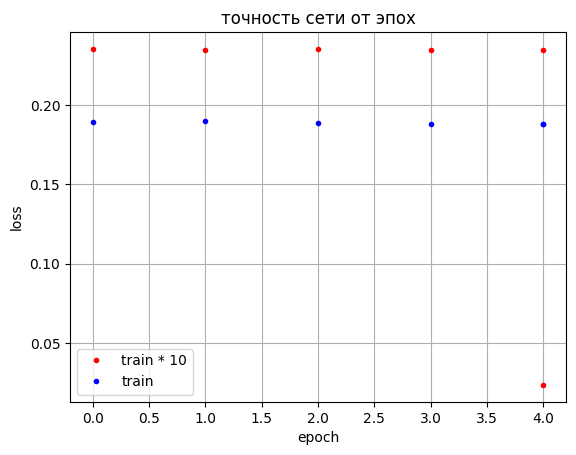

In [150]:
for i in [0,1,2,3,4]:
  model = Sequential( Linear(784,512), Sigmoid(),   # размер вектора на входе и  размера слоя (число нейронов)
                      Linear(512,256), Sigmoid(),# скрытый слой
                       Linear(256, 10), Softmax())   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)

  # собираем модель
  optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

  loss_fn = torch.nn.CrossEntropyLoss()

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  t1 = time.time()
  model, loss = train(model, device,train_loader, optimizer=optimizer, loss_fn=loss_fn, num_epochs = 5, n_plot = 937, )
  loss_test, acc_test = test(model, device, test_loader)
  print('time on work:',time.time() - t1)

  plt.plot(i,loss * 10,'r.' )
  plt.plot(i, loss_test,'b.' )

plt.plot(i,loss * 10, 'r.',label='train * 10')
plt.plot(i,loss_test,'b.', label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0]

Установим главный параметр любого оптимизатора - скорость обучения learning_rate и посмотрим на результат:

cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036
Epoch [1/5]. Step [938/938]. Loss: 0.032
Epoch [2/5]. Step [1/938]. Loss: 0.029
Epoch [2/5]. Step [938/938]. Loss: 0.029
Epoch [3/5]. Step [1/938]. Loss: 0.028
Epoch [3/5]. Step [938/938]. Loss: 0.028
Epoch [4/5]. Step [1/938]. Loss: 0.027
Epoch [4/5]. Step [938/938]. Loss: 0.026
Epoch [5/5]. Step [1/938]. Loss: 0.026
Epoch [5/5]. Step [938/938]. Loss: 0.025
Training is finished!
Training is finished!
loss_val: 0.19750113567113875
metric_val: 0.9018
time on work: 46.332897663116455
cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036
Epoch [1/5]. Step [938/938]. Loss: 0.027
Epoch [2/5]. Step [1/938]. Loss: 0.025
Epoch [2/5]. Step [938/938]. Loss: 0.024
Epoch [3/5]. Step [1/938]. Loss: 0.024
Epoch [3/5]. Step [938/938]. Loss: 0.024
Epoch [4/5]. Step [1/938]. Loss: 0.023
Epoch [4/5]. Step [938/938]. Loss: 0.024
Epoch [5/5]. Step [1/938]. Loss: 0.024
Epoch [5/5]. Step [938/938]. Loss: 0.024
Training is finished!
Training is finished!
lo

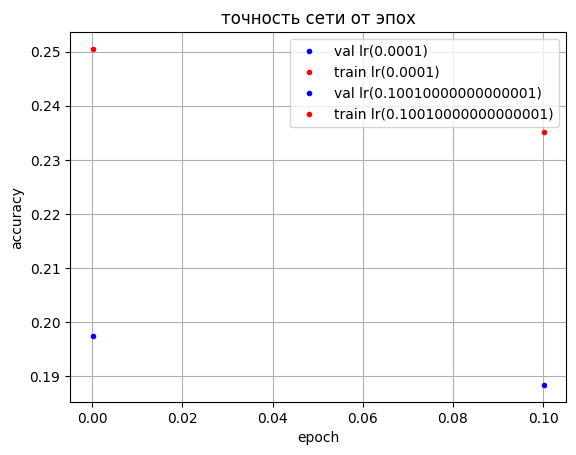

In [152]:
for i in [0,1]:

  model = Sequential( Linear(784,512), Sigmoid(),   # размер вектора на входе и  размера слоя (число нейронов)
                      Linear(512,256), Sigmoid(),# скрытый слой
                       Linear(256, 10), Softmax())   # на выходе стоит 10 нейронов, т.к. задача классификация цифр и активация activation='softmax' , которую принято использовать в классификации (вернет ответ в вероятностной форме - вероятность каждого выхода)

  # собираем модель
  optimizer = torch.optim.Adam(model.parameters(), lr = 0.01*i + 0.0001)

  loss_fn = torch.nn.CrossEntropyLoss()

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  t1 = time.time()
  model, loss = train(model, device,train_loader, optimizer=optimizer, loss_fn=loss_fn, num_epochs = 5, n_plot = 937, )
  loss_test, acc_test = test(model, device, test_loader)
  print('time on work:',time.time() - t1)

  plt.plot(0.0001+0.1*i, loss_test,'b.', label='val lr(' +str(0.0001+0.1*i)+')')
  plt.plot(0.0001+0.1*i, loss * 10  ,'r.', label='train lr(' +str(0.0001+0.1*i)+')')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Результаты не идентичны - скорость обучения влияет на результат

### **Задание 6**

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) torch.save(model.state_dict(), PATH_WEIGHTS)
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  - загружаем веса modeli.load_state_dict(torch.load(PATH_WEIGHTS))
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5]. Step [938/938]. Loss: 0.026
Epoch [2/5]. Step [1/938]. Loss: 0.025
Epoch [2/5]. Step [938/938]. Loss: 0.024
Epoch [3/5]. Step [1/938]. Loss: 0.024
Epoch [3/5]. Step [938/938]. Loss: 0.024
Epoch [4/5]. Step [1/938]. Loss: 0.024
Epoch [4/5]. Step [938/938]. Loss: 0.023
Epoch [5/5]. Step [1/938]. Loss: 0.024
Epoch [5/5]. Step [938/938]. Loss: 0.023
Training is finished!
Training is finished!
loss_val: 0.18711839170455932
metric_val: 0.9667
time on work: 43.446475982666016
cuda:0
cuda:0
Epoch [1/5]. Step [1/938]. Loss: 0.036
Epoch [1/5]. Step [938/938]. Loss: 0.036
Epoch [2/5]. Step [1/938]. Loss: 0.036
Epoch [2/5]. Step [938/938]. Loss: 0.036
Epoch [3/5]. Step [1/938]. Loss: 0.036
Epoch [3/5]. Step [938/938]. Loss: 0.036
Epoch [4/5]. Step [1/938]. Loss: 0.036
Epoch [4/5]. Step [938/938]. Loss: 0.036
Epoch [5/5]. Step [1/938]. Loss: 0.036
Epoch [5/5]. Step [938/938]. Loss: 0.036
Training is finished!
Training is finished!
loss_val: 0.28772930455207824
metric_val: 0.1135
time o

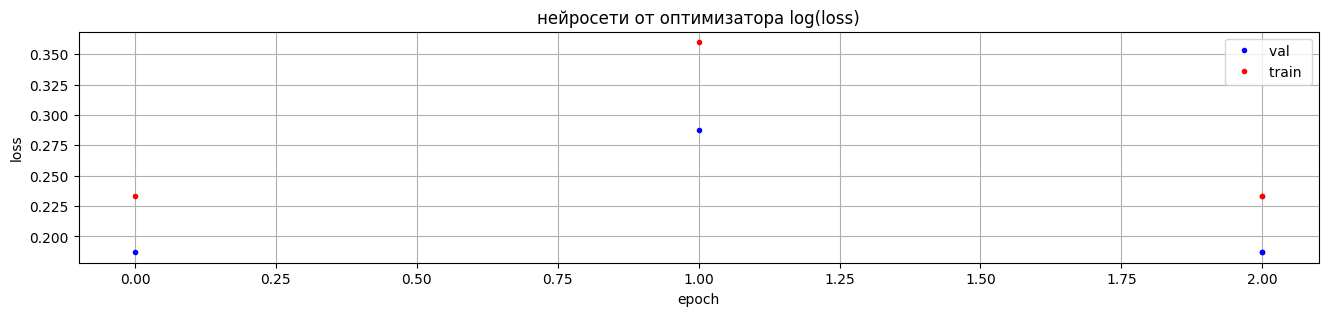

In [170]:
# создаем модель model
model = Sequential( Linear(784,512), Sigmoid(),   # размер вектора на входе и  размера слоя (число нейронов)
                    Linear(512,256), Sigmoid(),# скрытый слой
                    Linear(256, 10), Softmax())
# сохраняем ее веса (это начальная точка) model
torch.save(model.state_dict(), PATH_WEIGHTS)

plt.figure(figsize=(16,3))

# число рабочих эпох
epochs = 5
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

for i, i_optim in enumerate([Adam, SGD, RMSprop]):
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential( Linear(784,512), Sigmoid(),   # размер вектора на входе и  размера слоя (число нейронов)
                    Linear(512,256), Sigmoid(),# скрытый слой
                    Linear(256, 10), Softmax())
  # загружаем веса modeli
  modeli.load_state_dict(torch.load(PATH_WEIGHTS))

  optimizer = i_optim(modeli.parameters(), lr = 0.001)

  loss_fn = torch.nn.CrossEntropyLoss()

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  t1 = time.time()
  modeli, loss = train(modeli, device,train_loader, optimizer=optimizer, loss_fn=loss_fn, num_epochs = epochs, n_plot = 937, )
  loss_test, acc_test = test(modeli, device, test_loader)
  print('time on work:',time.time() - t1)

  plt.plot(i, loss_test,'b.')
  plt.plot(i, loss * 10  ,'r.')
plt.plot(i, loss_test,'b.', label='val ' )
plt.plot(i, loss * 10  ,'r.', label='train ' )
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Разные оптимизаторы (даже если одна начальная точка)  = разные результаты

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

<Figure size 1600x500 with 0 Axes>

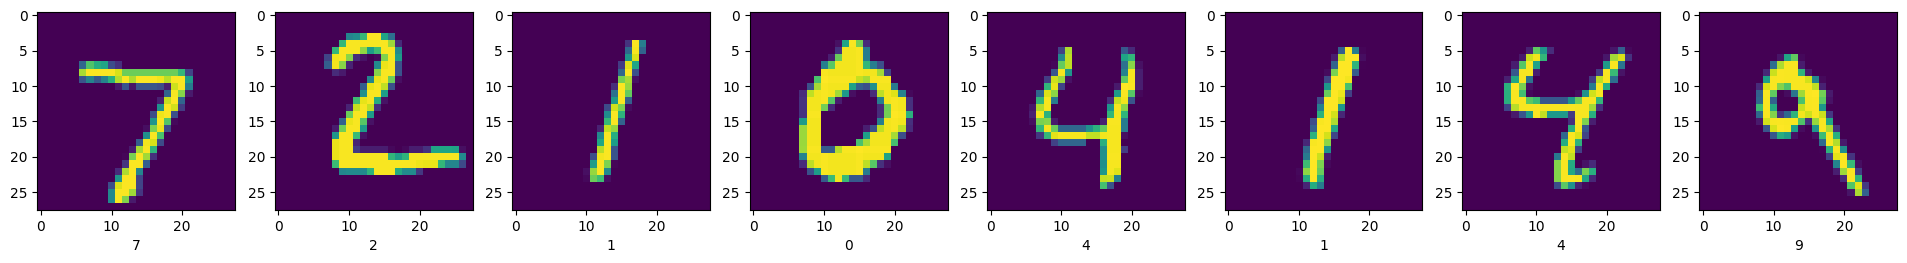

In [174]:
N = 8
modeli.eval()
plt.figure(figsize = (16,5))
for test_images,_ in test_loader:
  y_pred = modeli(test_images[:N,:,:,:].to(device).reshape(-1,784))
  y_pred_class = np.argmax(y_pred.cpu().detach().numpy(),axis=1)
  plt.figure(figsize =(3*N,5))
  for i in range(N):
    plt.subplot(1,N,i+1)
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i]))
  plt.show()
  break

А так выглядит выход сети до постобработки:

In [175]:
y_pred[0,:]

tensor([9.2450e-11, 8.6446e-11, 4.0013e-07, 9.9093e-08, 2.8145e-12, 9.8178e-12,
        5.8403e-18, 1.0000e+00, 2.6007e-11, 2.3486e-08], device='cuda:0',
       grad_fn=<SliceBackward0>)

### **Задание 6**

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

# Классификация изображений одежды

In [176]:
from torchvision.datasets import  FashionMNIST  # импорт функции для загрузки набора данных (это рукописные цифры)
from torchvision import transforms

# читаем данные из базового датасета MNIST для обучения
train_dataset= FashionMNIST(root='',train=True, transform=transforms.ToTensor(), download=True)   # загружаем (вернет кортеж тренировочный примров (изображение, метка)
# get pair
image, label = train_dataset[0]

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)
# читаем данные из базового датасета MNIST для обучения
test_dataset= FashionMNIST(root='',train=False, transform=transforms.ToTensor(), download=True)   # загружаем (вернет кортеж тренировочный примров (изображение, метка)
# get pair
image, label = train_dataset[0]

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=64,
                                           shuffle=False)

100%|██████████| 26421880/26421880 [00:00<00:00, 116136986.86it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5913015.02it/s]


Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 64169359.84it/s]


Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24370515.79it/s]


Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw



## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [177]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета

Давайте посмотрим структуры полученного массива данных:

In [179]:
len(train_dataset)

60000

In [180]:
len(test_dataset)

10000

Проанализируем тестовую выборку:

<Figure size 1600x500 with 0 Axes>

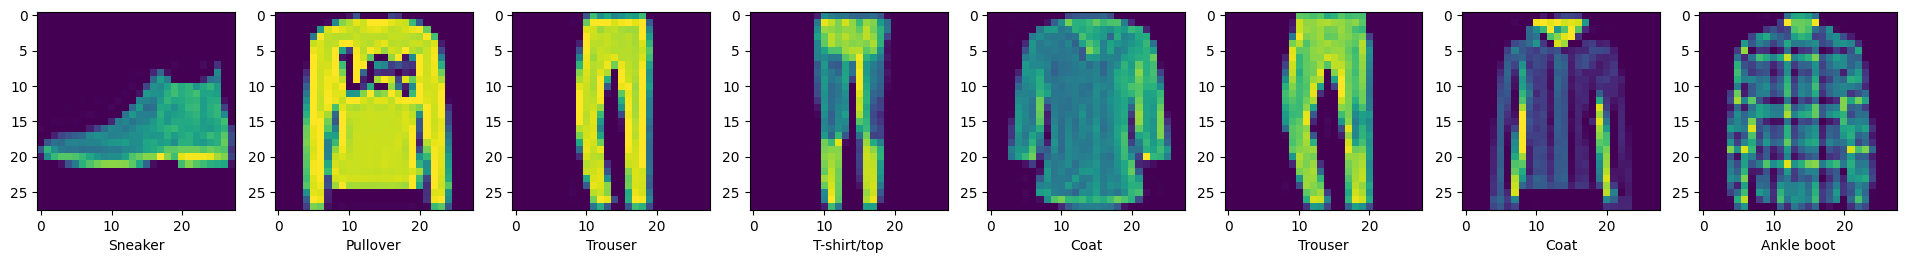

In [181]:
N = 8
modeli.eval()
plt.figure(figsize = (16,5))
for test_images,label in test_loader:

  plt.figure(figsize =(3*N,5))
  for i in range(N):
    plt.subplot(1,N,i+1)
    plt.imshow(test_images[i,:,:,:].reshape(28,28))
    plt.xlabel(class_names[y_pred_class[i]])
  plt.show()
  break

In [182]:
test_images.shape

torch.Size([64, 1, 28, 28])

In [183]:
len(label)

64

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

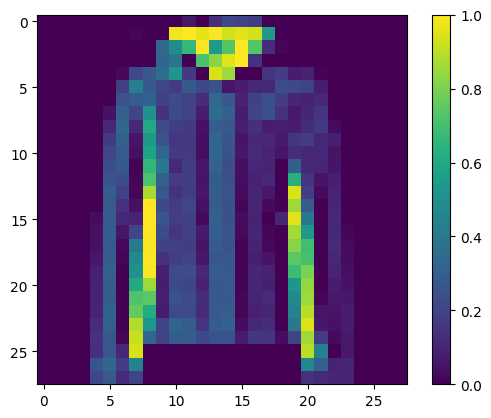

In [186]:
plt.figure()
plt.imshow(test_images[6,0,:,:])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# обработать входные признаки и целевой признак

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

## Тренировка модели





Посмотрим на возвращаемый словарь hh.history (там результаты по эпохам для потерь и метрик по обучению и тестам)

Покажем как выглядит кривая обучения

### Предсказания нейросети



### Проверка предсказаний

матрица ошибок (можно из sklearn)

## Использование полученной модели


возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети -

Сохраним модель на диск

## **Задание 7**

1. На датасет from sklearn.datasets import load_boston подготовить данные к обучению (разделить на тест и тренировочный набор, масштабировать признаки и привести их к типу float).
2. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали : меняем число слоев, число нейронов , типы активации)  - помним , что выходная активация должна позволять построить целевое свойство
3. Выберите функцию потерь и метрику из доступных в Тензорфлоу
4. Провести обучение модели и оценить результаты

## Дополнительные материалы

<ol>
    <li> https://pytorch.org/tutorials/beginner/pytorch_with_examples.html</li>
    <li> https://playground.tensorflow.org/ - визуализация сетей (очень симпатично - посмотрите)
    <li> сравнение фреймвоков глубокого обучения https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1
</ol>

## Используемая литература

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://pytorch.org/ecosystem/</li>
    <li>https://pytorch.org/tutorials/</li>
    <li>Саймон Хайкин — Нейронные сети: полный курс</li>
    <li>Википедия</li>
    
</ol>

Вопросы:

1. Какую проблему решает обратное распространение ошибки
2. Какие проблемы возникают при обратном распространении ошибки
3. Какую сложность может обеспечить многослойная сеть с только линейными активациями
4. Опишите достоинства и недостатки сигмоидной активации
5. Опишите достоинства и недостатки линейных активаций
6. Опишите модель формального нейрона МакКалока-Питца
7. Опишите процесс коррекции весов нейрона
8. Поясните особенности методов градиентного спуска с моментами
9. Поясните особенности методов градиентного спуска с адаптацией шага обучения